In [1]:
import tradingeconomics as te
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import time
import mplfinance as mpf
import matplotlib.dates as mpl_dates

import json
import urllib
import sys

from datetime import datetime, timedelta
from tradingeconomics import glob
import ssl
from urllib.request import urlopen

In [23]:
te.login('jupyter:jupyter') # Signup for a free API key at https://developer.tradingeconomics.com/

'You are logged in as a jupyter:jupyter'

## Solar Energy Index performance 

#### SILVER is the smallest component of a solar panel by weight but it is also the most expensive.

In [21]:
def getCmtName(symbol_list):
    name_list = []
    unit_list = []
    decimals_list = []
    linkAPI = f'https://api.tradingeconomics.com/markets/commodities?c={glob.apikey}'
    response = urlopen(linkAPI)
    code = response.getcode()
    webResults = json.loads(response.read().decode('utf-8'))
    maindf = pd.DataFrame(webResults)
    for symbol in symbol_list:
        symbol_name = maindf.query(f'Symbol == "{symbol}"')
        name_list.append(symbol_name['Name'].values)
        unit_list.append(symbol_name['unit'].values)
        decimals_list.append(symbol_name['decimals'].values)
    dict_map = {
            "name_list": [name_list],
            "unit_list": [unit_list],
            "decimals_list": [decimals_list]
            }
    return dict_map
    
def getHistoricalData(symbol_list, initDate, endDate):
    dataframe_list = []
    for symbol in symbol_list:
        dataframe_list.append(te.fetchMarkets(symbol = symbol, initDate = initDate, endDate = endDate, output_type='df'))
    return dataframe_list
    
        
def plot2(dataframe_list, symbol_list, dict_map):
    dataframe_list[0]['close'].plot(kind='line', figsize=(20, 10),legend='s', label = 'Solar Energy Index', ylabel='Solar Energy Index')
    dataframe_list[1]['close'].plot(secondary_y=True, color='black',legend='s', label = 'Silver')
    plt.title("Solar Energy Index performance", size=20)
    

def getCmtPerformanceEnergy(symbol_list, initDate, endDate):
    if endDate is None:
        endDate = str((datetime.now().date()))
        initDate = str((datetime.today() - timedelta(days=1)).date()) 
    dataframe_list = getHistoricalData(symbol_list, initDate, endDate)
    dict_map = getCmtName(symbol_list)
    plot2(dataframe_list, symbol_list, dict_map)


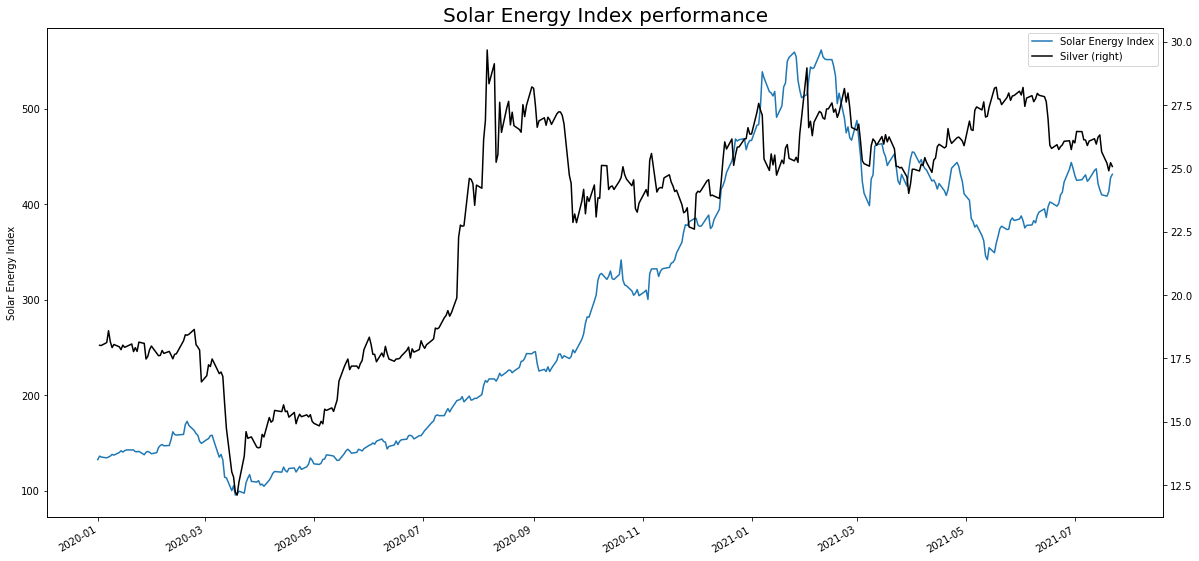

In [22]:
symbol_list = ['SOLARNTR:IND','XAGUSD:CUR' ]
initDate = '2020-01-01'
endDate = '2021-07-22' #if None, current date will be used
getCmtPerformanceEnergy(symbol_list, initDate, endDate)